# Melur Erwina binti Mohamad Iskandar

## Research question/interests

**Is being self-sufficient the main core of self-care in leading a thriving life?**

This research question is exploring to find out if physical health is the foundation for a healthy mind. I'm assuming that a person who is able to take care of oneself would have a great self-discipline in navigating life, hence will be better in being productive in daily life. As the concept of healthy body equals to healthy mind, I’m planning to compare factors that constitute to physical health (Sleep_Hours, BMI, Fruit_veggies, Daily_Steps) to healthy mind factors (Todo_complete, Daily_stress).

### Analysis Plan:
1. I would only keep the columns of the factors  I’m interested in (Sleep_Hours, BMI_range, Fruit_veggies, Daily Steps, Todo_complete, Daily_stress) and demographic (Gender) for observation purposes.
1. I will then remove rows that contain Na values to draw a more solid observation and apply the dataframe describe function for an overview of the data.
1. Then, I would observe the distribution of (Fruit_veggies and  Daily_Steps) to (BMI_range) as a measure of healthy body, and distribution of (sleep_hours and BMI_range) to (todo_complete) to see if self-sufficient will drive motivation to accomplish things in life.
1. I will then observe the correlation between (todo_complete and daily_stress) to conclude whether an orderly and productive life would impose less stress and (BMI_range) to (daily_stress) to see if healthy lifestyle will lead to healthy mind.

## Loading Dataset

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df = pd.read_csv("../data/raw/Wellbeing_and_lifestyle_data_Kaggle.csv")
df

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15967,3/14/21 5:42,3,3,0,4,0,10,0,4,2,...,7,0,1,1,5,2,5,51 or more,Female,644.5
15968,3/14/21 6:30,3,3,6,8,7,4,6,3,1,...,6,0,0,2,10,5,8,21 to 35,Female,714.9
15969,3/14/21 8:35,4,3,0,10,10,8,6,5,1,...,7,0,1,2,10,1,10,21 to 35,Male,716.6
15970,3/14/21 8:43,1,1,10,8,2,7,3,2,1,...,8,7,2,2,1,6,8,21 to 35,Female,682.0


## Milestone 3

### Task 1: Conduct an Exploratory Data Analysis (EDA) on your datase

In [16]:
dfa = df[["SLEEP_HOURS", "BMI_RANGE", "FRUITS_VEGGIES", "DAILY_STEPS", "TODO_COMPLETED", "DAILY_STRESS", "GENDER"]]
dfa

,SLEEP_HOURS,BMI_RANGE,FRUITS_VEGGIES,DAILY_STEPS,TODO_COMPLETED,DAILY_STRESS,GENDER
0,7,1,3,5,6,2,Female
1,8,2,2,5,5,3,Female
2,8,2,2,4,2,3,Female
3,5,2,3,5,3,3,Female
4,7,2,5,5,5,1,Female
...,...,...,...,...,...,...,...
15967,7,2,3,10,8,3,Female
15968,6,1,3,6,7,3,Female
15969,7,1,4,5,7,3,Male
15970,8,1,1,1,6,1,Female


In [17]:
dfa.head()

,SLEEP_HOURS,BMI_RANGE,FRUITS_VEGGIES,DAILY_STEPS,TODO_COMPLETED,DAILY_STRESS,GENDER
0,7,1,3,5,6,2,Female
1,8,2,2,5,5,3,Female
2,8,2,2,4,2,3,Female
3,5,2,3,5,3,3,Female
4,7,2,5,5,5,1,Female


In [18]:
dfa.dropna()

,SLEEP_HOURS,BMI_RANGE,FRUITS_VEGGIES,DAILY_STEPS,TODO_COMPLETED,DAILY_STRESS,GENDER
0,7,1,3,5,6,2,Female
1,8,2,2,5,5,3,Female
2,8,2,2,4,2,3,Female
3,5,2,3,5,3,3,Female
4,7,2,5,5,5,1,Female
...,...,...,...,...,...,...,...
15967,7,2,3,10,8,3,Female
15968,6,1,3,6,7,3,Female
15969,7,1,4,5,7,3,Male
15970,8,1,1,1,6,1,Female


### Observation
- No NaN values recorded for the focused columns in the dataframe.

In [19]:
dfa.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
SLEEP_HOURS,15972.0,7.042888,1.199044,1.0,6.0,7.0,8.0,10.0
BMI_RANGE,15972.0,1.410656,0.491968,1.0,1.0,1.0,2.0,2.0
FRUITS_VEGGIES,15972.0,2.922677,1.442694,0.0,2.0,3.0,4.0,5.0
DAILY_STEPS,15972.0,5.703606,2.891013,1.0,3.0,5.0,8.0,10.0
TODO_COMPLETED,15972.0,5.745993,2.624097,0.0,4.0,6.0,8.0,10.0


In [20]:
dfa.describe(exclude='number').T

,count,unique,top,freq
DAILY_STRESS,15972,7,3,4398
GENDER,15972,2,Female,9858


### Observation
- This table shows that there are 7 unique values of Daily Stress variables when in fact there are only 6 levels option of answers.
- This means that there is an unwanted value in the dataframe column.
- Therefore, this value must be recognised and dropped.

In [21]:
dfa["DAILY_STRESS"].unique()

array(['2', '3', '1', '4', '5', '0', '1/1/00'], dtype=object)

In [22]:
dfa.loc[dfa["DAILY_STRESS"]=="1/1/00"]

,SLEEP_HOURS,BMI_RANGE,FRUITS_VEGGIES,DAILY_STEPS,TODO_COMPLETED,DAILY_STRESS,GENDER
10005,6,2,3,6,6,1/1/00,Male


In [23]:
dfa = dfa.drop([10005]).reset_index(drop=True)
dfa

,SLEEP_HOURS,BMI_RANGE,FRUITS_VEGGIES,DAILY_STEPS,TODO_COMPLETED,DAILY_STRESS,GENDER
0,7,1,3,5,6,2,Female
1,8,2,2,5,5,3,Female
2,8,2,2,4,2,3,Female
3,5,2,3,5,3,3,Female
4,7,2,5,5,5,1,Female
...,...,...,...,...,...,...,...
15966,7,2,3,10,8,3,Female
15967,6,1,3,6,7,3,Female
15968,7,1,4,5,7,3,Male
15969,8,1,1,1,6,1,Female


### Observation
- One row is dropped from the dataframe due to an illogical value in Daily Stress column leaving 15971 rows.

In [24]:
dfa.describe(exclude='number').T

,count,unique,top,freq
DAILY_STRESS,15971,6,3,4398
GENDER,15971,2,Female,9858


In [25]:
dfa["DAILY_STRESS"] = pd.to_numeric(dfa["DAILY_STRESS"])

In [26]:
dfa["BMI_RANGE"].astype('category', copy=False)

0        1
1        2
2        2
3        2
4        2
        ..
15966    2
15967    1
15968    1
15969    1
15970    2
Name: BMI_RANGE, Length: 15971, dtype: category
Categories (2, int64): [1, 2]

### Observation
- Change column **BMI_RANGE** and **TODO_COMPLETED** to categorical so the variable can be used as hue when plotting graphs. to be excluded from calulated numerically.

### Data Visualisation

<AxesSubplot: xlabel='DAILY_STEPS', ylabel='FRUITS_VEGGIES'>

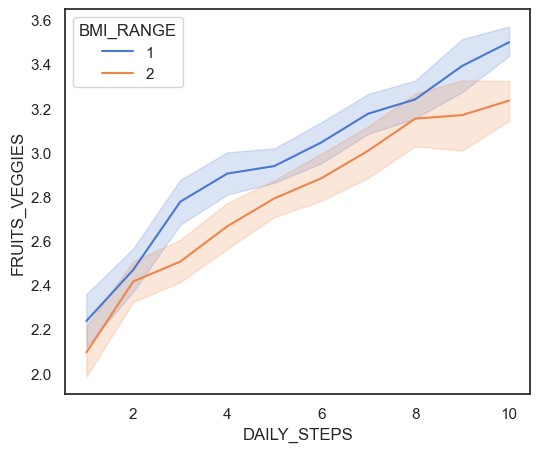

In [27]:
sns.lineplot(x="DAILY_STEPS", y="FRUITS_VEGGIES",
             hue="BMI_RANGE", palette="muted",
             data=dfa)

### Observation
- The line graph shows that at each amount of daily steps, higher intake of fruits and vegetables result in lower BMI range (1; below 25 BMI count)
- This indicates that that fruits and vegetables plays a bigger role than daily steps in contributing to BMI index.

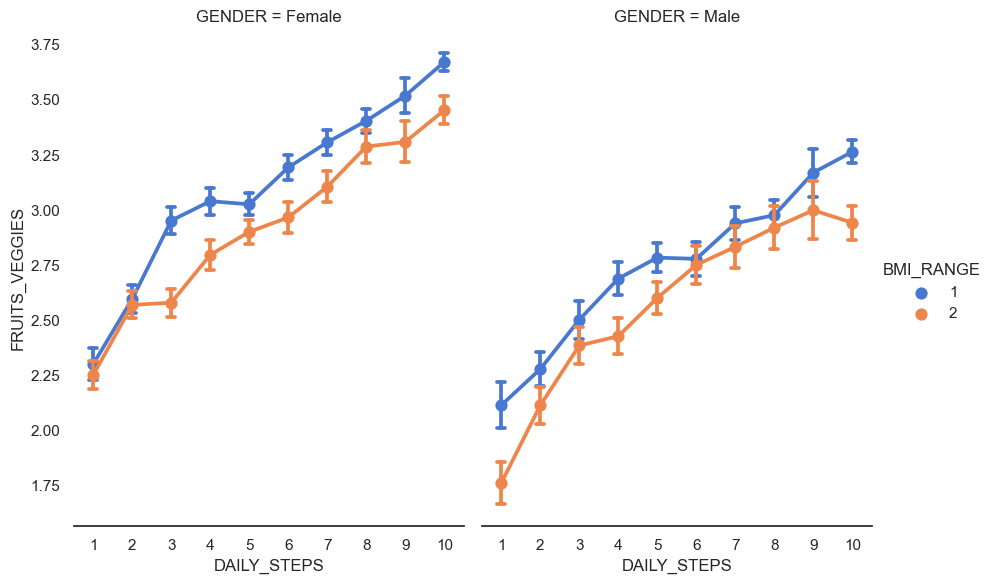

In [28]:
g = sns.catplot(
    data=dfa, x="DAILY_STEPS", y="FRUITS_VEGGIES",
    hue="BMI_RANGE", palette="muted", col="GENDER",
    capsize=.2, errorbar="se",
    kind="point", height=6, aspect=.75,
)
g.despine(left=True)

### Observation
- Demographically. Male eat less fruits and vegetables than female.


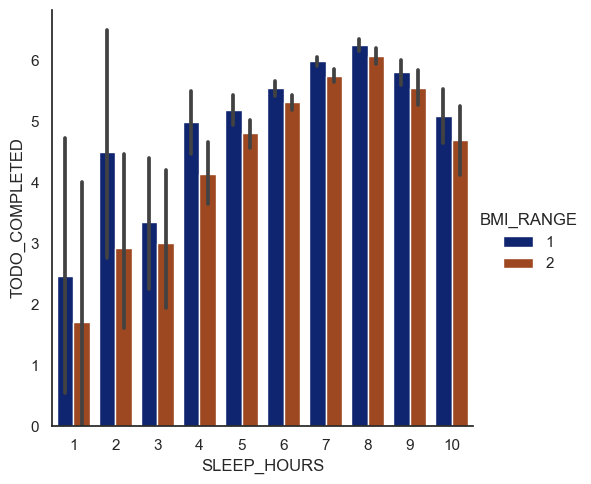

In [29]:
sns.catplot(
    data=dfa, kind="bar",
    x="SLEEP_HOURS", y="TODO_COMPLETED", hue="BMI_RANGE", palette="dark")

### Observation
- Overall, BMI_RANGE level 1 (lower BMI count: not overweight) has higher completed task than BMI_RANGE level 2.
- The completed task increase as sleep hours increases from 1 to 8, then decrease as sleep hours go beyond 8.
- This graph shows that 8 hours of sleep with level 1 of BMI_RANGE has the highest productivity in daily life measured by how well one complete their tasks, followed by level 2 of BMI_RANGE, although not by much difference.
- This indicates that the ability to take care of oneself (optimum hours of sleep and BMI range) determine the level of productivity in daily as driven by self-discipline.

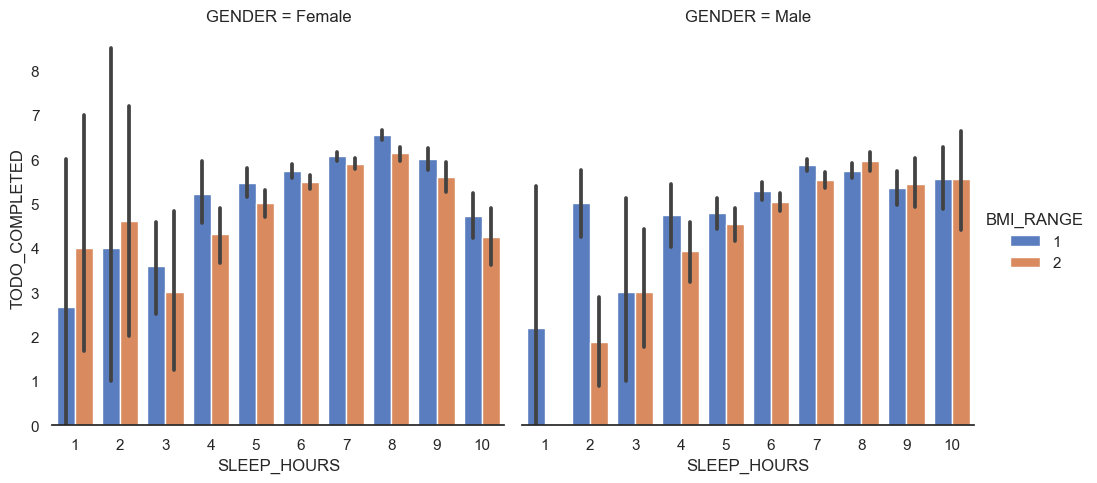

In [30]:
g = sns.catplot(dfa, x="SLEEP_HOURS", y="TODO_COMPLETED", hue="BMI_RANGE",
    palette="muted", col="GENDER", kind="bar"
)
g.despine(left=True)

### Observation
- Completed task peak at 8 hours of sleep for female and at 7 hours of sleep for male.

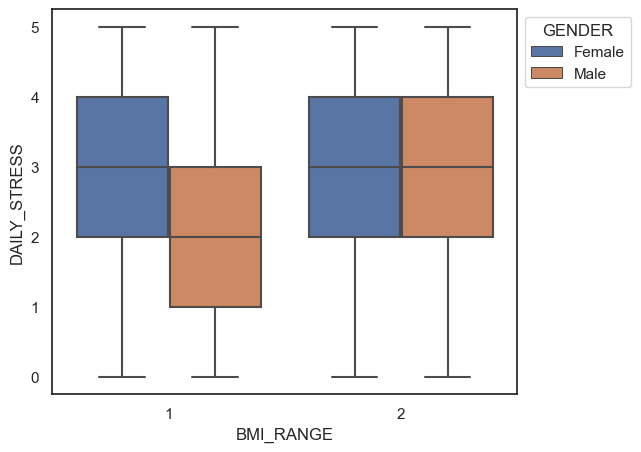

In [31]:
s = sns.boxplot(data=dfa, x="BMI_RANGE", y="DAILY_STRESS", hue="GENDER")
sns.move_legend(s, "upper left", bbox_to_anchor=(1, 1))

### Observation
- The boxplot graph shows that lower BMI count in males result in lower levels of daily stress compared to female.

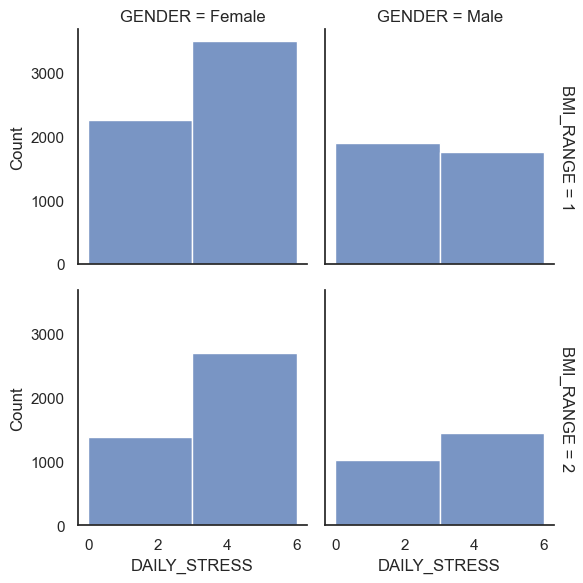

In [32]:
sns.displot(
    dfa, x="DAILY_STRESS", col="GENDER", row="BMI_RANGE",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

<AxesSubplot: xlabel='DAILY_STRESS', ylabel='count'>

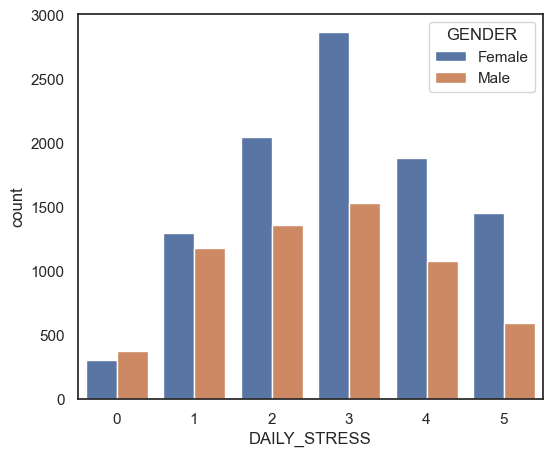

In [33]:
sns.countplot(data=dfa, x="DAILY_STRESS", hue="GENDER")

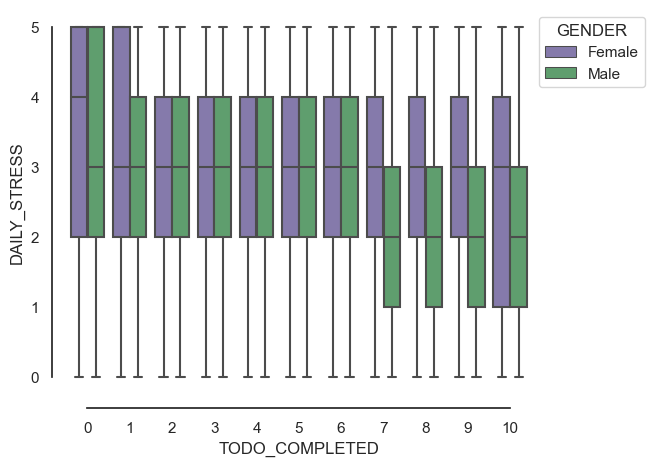

In [34]:
b = sns.boxplot(x="TODO_COMPLETED", y="DAILY_STRESS", hue="GENDER",
           palette=["m", "g"],
            data=dfa)
sns.despine(offset=10, trim=True)
sns.move_legend(b, "upper left", bbox_to_anchor=(1, 1))

### Observation
- The boxplot graph shows that having more completed task result in lower levels of daily stress in males while females shown to retain the stress level regardless of increase in number of completed task.
- Only at the highest number of completed task does females shown a bigger range with lower level of daily stress.

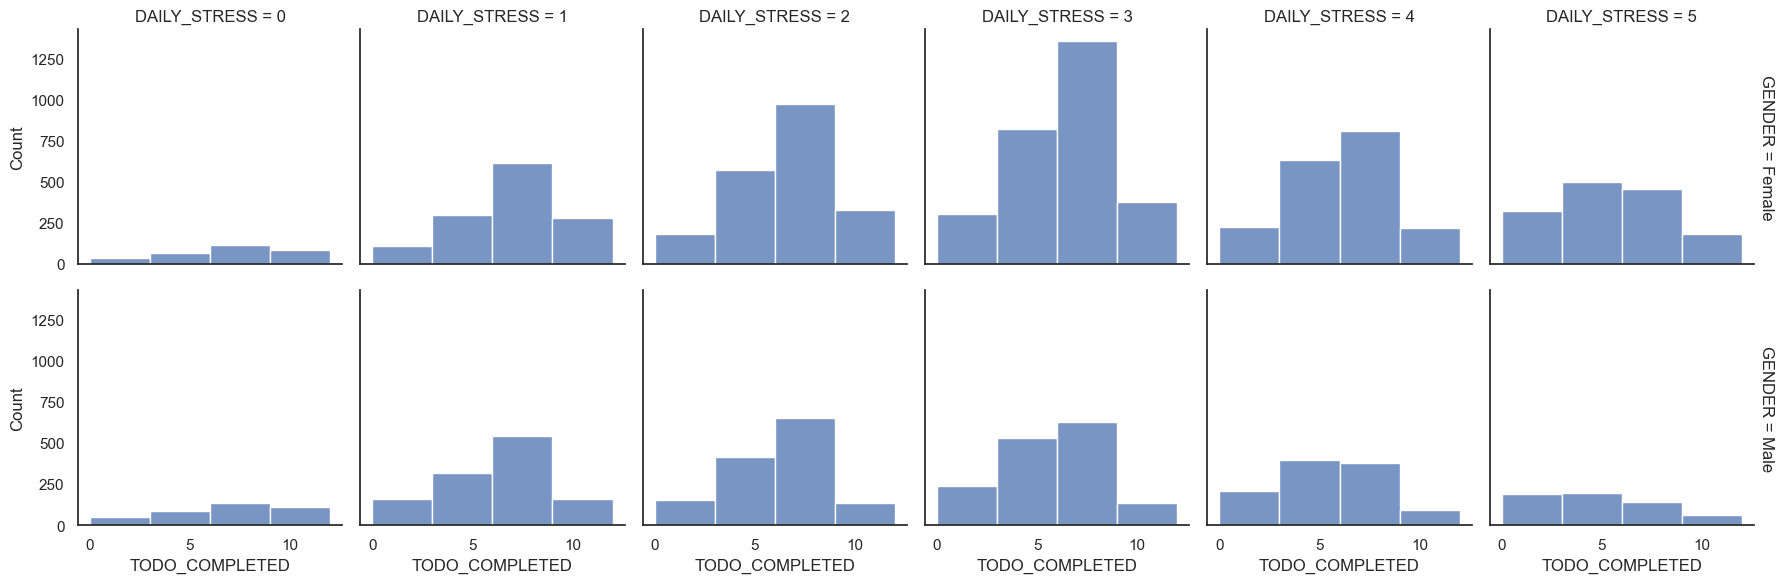

In [35]:
sns.displot(
    dfa, x="TODO_COMPLETED", col="DAILY_STRESS", row="GENDER", kind="hist",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
)

#### Next Analysis
- More details on dissection of data visualisation

## Milestone 4

### Task 1: Set up an “Analysis Pipeline”

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
#Load Data
import sys
sys.path.append("code")
from project_functions3 import load_process

dfc = load_process("../data/raw/Wellbeing_and_lifestyle_data_Kaggle.csv")
dfc

,FRUITS_VEGGIES,DAILY_STRESS,BMI_RANGE,TODO_COMPLETED,DAILY_STEPS,SLEEP_HOURS,GENDER
0,3,0,1,2,5,9,Male
1,5,0,1,10,8,8,Female
2,5,0,1,6,3,7,Male
3,5,0,1,10,9,9,Male
4,3,0,2,6,10,7,Female
...,...,...,...,...,...,...,...
15966,1,5,2,2,3,6,Female
15967,2,5,1,3,2,7,Male
15968,0,5,2,0,1,8,Male
15969,4,5,2,5,2,8,Female


## Function load_process built
Function load_process is built to load, clean, process, and wrangle data accordingly to answer the research question. This includes, dropping columns, rows that contains NaN, changing data types, remove irrelevant data, and reset index. Justification for dropping specific row index 1005 and converting data type of some columns in the function is explain below. In order to remove the irrelevant data, identification is carried as shown below before specifying which index to be dropped in the function.

In [83]:
# Using variable dfa as an example to show how the function is built
df = pd.read_csv("../data/raw/Wellbeing_and_lifestyle_data_Kaggle.csv")
dfa = df.drop(columns=["PLACES_VISITED", "CORE_CIRCLE", "SUPPORTING_OTHERS", 
                         "SOCIAL_NETWORK", "ACHIEVEMENT", "DONATION", "LOST_VACATION", 
                         "DAILY_SHOUTING", "SUFFICIENT_INCOME", "PERSONAL_AWARDS", "TIME_FOR_PASSION", 
                         "WEEKLY_MEDITATION", "AGE", "WORK_LIFE_BALANCE_SCORE", "FLOW", "LIVE_VISION", 
                         "Timestamp"])

In [84]:
dfa.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
FRUITS_VEGGIES,15972.0,2.922677,1.442694,0.0,2.0,3.0,4.0,5.0
BMI_RANGE,15972.0,1.410656,0.491968,1.0,1.0,1.0,2.0,2.0
TODO_COMPLETED,15972.0,5.745993,2.624097,0.0,4.0,6.0,8.0,10.0
DAILY_STEPS,15972.0,5.703606,2.891013,1.0,3.0,5.0,8.0,10.0
SLEEP_HOURS,15972.0,7.042888,1.199044,1.0,6.0,7.0,8.0,10.0


In [85]:
dfa.describe(exclude='number').T

,count,unique,top,freq
DAILY_STRESS,15972,7,3,4398
GENDER,15972,2,Female,9858


Daily Stress column shows that there are 7 unique values when there are only 6 levels option of answers. This means that there is an unwanted value in the dataframe column. Therefore, the row containing this value must be recognised and dropped.

In [86]:
dfa["DAILY_STRESS"].unique()

array(['2', '3', '1', '4', '5', '0', '1/1/00'], dtype=object)

In [88]:
dfa.loc[dfa["DAILY_STRESS"]=="1/1/00"]

,FRUITS_VEGGIES,DAILY_STRESS,BMI_RANGE,TODO_COMPLETED,DAILY_STEPS,SLEEP_HOURS,GENDER
10005,3,1/1/00,2,6,6,6,Male


In [89]:
dfa = dfa.drop([10005]).reset_index(drop=True)

Row index 1005 is dropped from the dataframe due to an illogical value in Daily Stress column leaving 15971 rows.

In [90]:
#Check file types
dfa.dtypes

FRUITS_VEGGIES     int64
DAILY_STRESS      object
BMI_RANGE          int64
TODO_COMPLETED     int64
DAILY_STEPS        int64
SLEEP_HOURS        int64
GENDER            object
dtype: object

The data type was first identified before changing them to desired data type. Column **BMI_RANGE** and **TODO_COMPLETED** are type int64. **BMI_RANGE** data are 1 and 2 with each data brackets a BMI range. They do not represent BMI value. Therefore, data type in **BMI_RANGE** needs to be changed to object to be excluded from being identified as numerical. This allows **BMI_RANGE** data to be used as hue when plotting graphs to answer the research question. Column **TODO_COMPLETED** needs to be changed to object type so it can be used as hue when plotting graphs. Column **DAILY_STRESS** needs to be changed to integer since the data is number and not string to avoid complication for order of x axis variables

In [91]:
dfa['BMI_RANGE'] = dfa.BMI_RANGE.astype(object)
dfa['TODO_COMPLETED'] = dfa.TODO_COMPLETED.astype(object)
dfa["DAILY_STRESS"] = dfa["DAILY_STRESS"].astype(int)

In [92]:
#Check file types again
dfa.dtypes

FRUITS_VEGGIES     int64
DAILY_STRESS       int32
BMI_RANGE         object
TODO_COMPLETED    object
DAILY_STEPS        int64
SLEEP_HOURS        int64
GENDER            object
dtype: object

### Task 3: Conduct your analysis to help answer your research question(s)

## Research question/interests

**Is being self-sufficient the main core of self-care in leading a thriving life?**

This research question is exploring to find out if physical health is the foundation for a healthy mind. I'm assuming that a person who is able to take care of oneself would have a great self-discipline in navigating life, hence will be better in being productive in daily life. As the concept of healthy body equals to healthy mind, I’m planning to compare factors that constitute to physical health (Sleep_Hours, BMI, Fruit_veggies, Daily_Steps) to healthy mind factors (Todo_complete, Daily_stress).

### Analysis Plan:
1. Observe the distribution of (Fruit_veggies and  Daily_Steps) to (BMI_range) as a measure of healthy body.
1. Observe the distribution of (sleep_hours and BMI_range) to (todo_complete) to see if self-sufficient will drive motivation to accomplish things in life.
1. Observe the correlation between (todo_complete) and (daily_stress) to conclude whether an orderly and productive life would impose less stress 
1. Observe the correlation between (BMI_range) and (daily_stress) to see if healthy lifestyle will lead to healthy mind.

### Data Visualisation

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### The distribution of (Fruit_veggies and Daily_Steps) to (BMI_range) as a measure of healthy body.

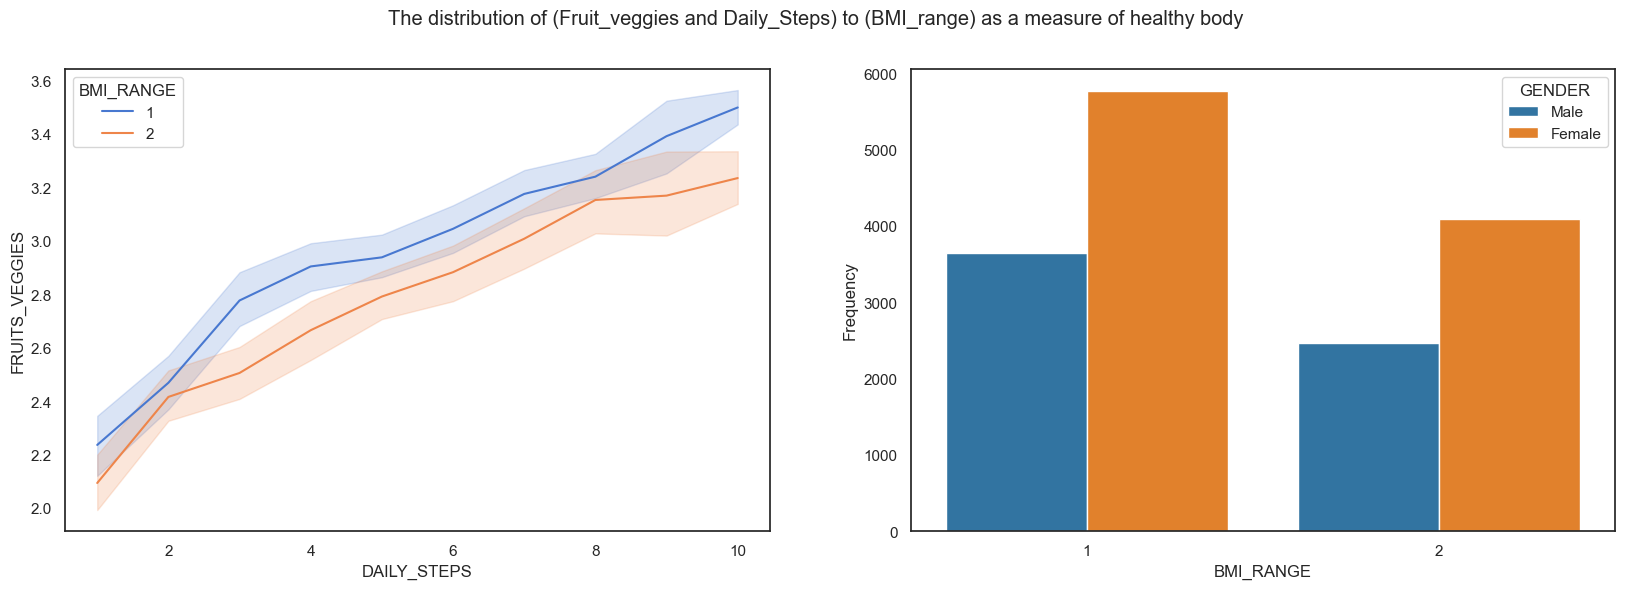

In [98]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,6))
sns.set( style="white") #width=20, height=6
a = sns.lineplot(x="DAILY_STEPS", y="FRUITS_VEGGIES",
             hue="BMI_RANGE", palette="muted",
             data=dfc, ax=ax1)
b = sns.countplot(x="BMI_RANGE",
             hue="GENDER", palette="tab10",
             data=dfc, ax=ax2)
b.set(ylabel='Frequency')
plt.suptitle("The distribution of (Fruit_veggies and Daily_Steps) to (BMI_range) as a measure of healthy body")
plt.savefig("../images/analysis3_1.png")

### Observation
The distribution of and relationship of physical health factors (FRUIT_VEGGIES and DAILY_STEPS) are observed by plotting a line graph with BMI_RANGE used as a hue.
The line graph shows that at each amount of daily steps, higher intake of fruits and vegetables result in lower BMI range (1; below 25 BMI count). This indicates that that fruits and vegetables plays a bigger role than daily steps in contributing to BMI index. 
The bar chart shows that both genders has more frequency with lower BMI range.
The difference in frequency of genders for each BMI range is not taken into consideration since the distribution of genders in dataset is not equal.

Text(0.5, 0.98, 'The distribution of (Fruit_veggies and Daily_Steps) to (BMI_range) as a measure of healthy body')

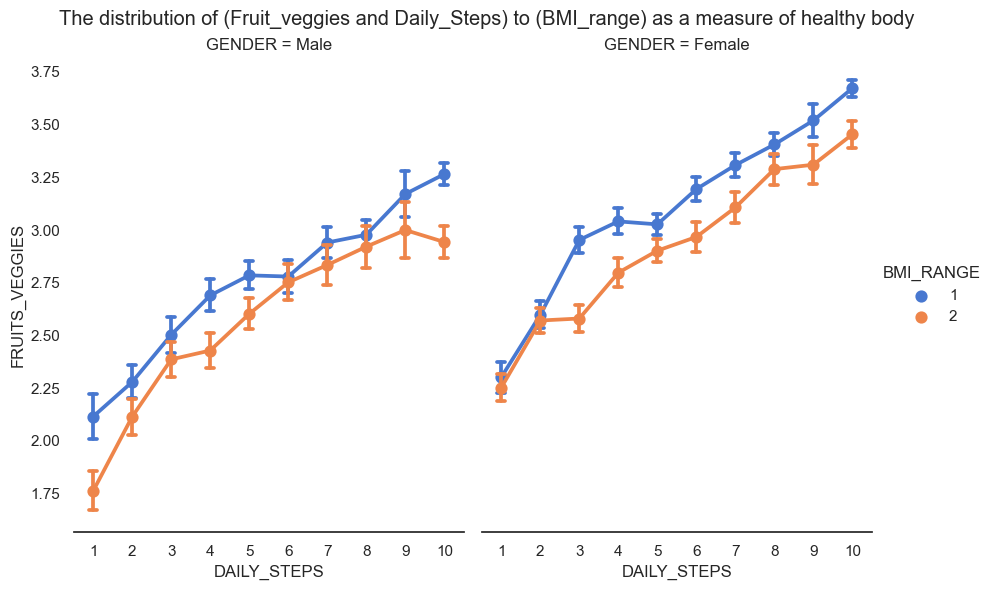

In [99]:
c = sns.catplot(
    data=dfc, x="DAILY_STEPS", y="FRUITS_VEGGIES",
    hue="BMI_RANGE", palette="muted", col="GENDER",
    capsize=.2, errorbar="se",
    kind="point", height=6, aspect=.75,
)
c.despine(left=True)
c.fig.subplots_adjust(top=0.9)
c.fig.suptitle("The distribution of (Fruit_veggies and Daily_Steps) to (BMI_range) as a measure of healthy body")

### Observation
The graph shows that male gender manages to achieve lower BMI range despite eating less fruits and vegetables than female.
This might be due to biological aspect of metabolism in gender.
Women tend to have slowerm metabolism than men.

### The distribution of (Sleep_hours and BMI_range) to (Todo_complete) as a measure of self-sufficient in productivity.

Text(0.5, 0.98, 'The distribution of (Sleep_hours and BMI_range) to (Todo_complete) as a measure of self-sufficient in productivity')

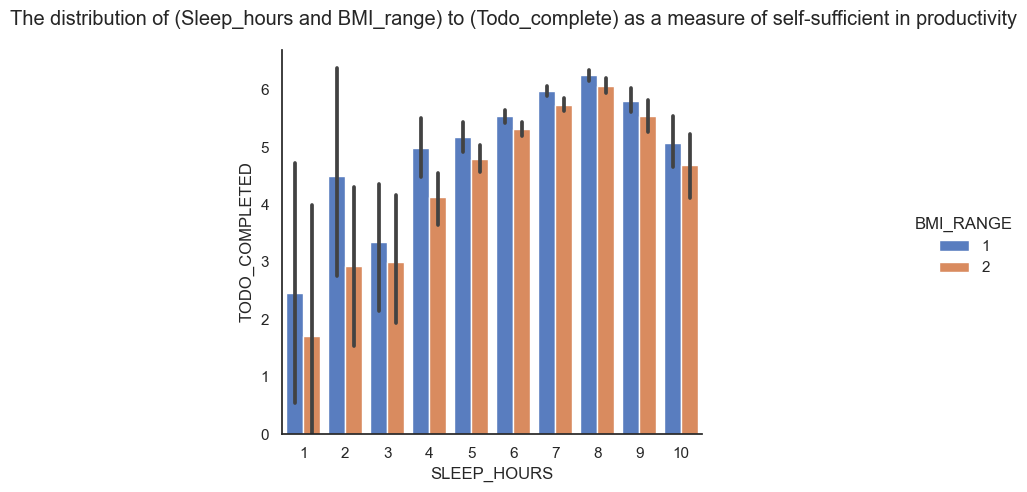

In [100]:
d = sns.catplot(
    data=dfc, kind="bar",
    x="SLEEP_HOURS", y="TODO_COMPLETED", hue="BMI_RANGE", palette="muted")

d.fig.subplots_adjust(top=0.9)
d.fig.suptitle("The distribution of (Sleep_hours and BMI_range) to (Todo_complete) as a measure of self-sufficient in productivity")

### Observation
After observing the relationship between physical health factors, the integration of self-sufficient and self-discipline in a person’s productivity rate is observed through different physical health factors. The overall bar chart shows that BMI_RANGE level 1 (lower BMI count: not overweight) has higher completed task than BMI_RANGE level 2. The completed task increase as sleep hours increases from 1 to 8, then decrease as sleep hours go beyond 8. This chart shows that 8 hours of sleep with level 1 of BMI_RANGE has the highest productivity in daily life measured by how well one complete their tasks, followed by level 2 of BMI_RANGE, although not by much difference. This indicates that the ability to take care of oneself (optimum hours of sleep and BMI range) determine the level of productivity in daily as driven by self-discipline. This proves that being self-sufficient will drive motivation to accomplish things in life. 

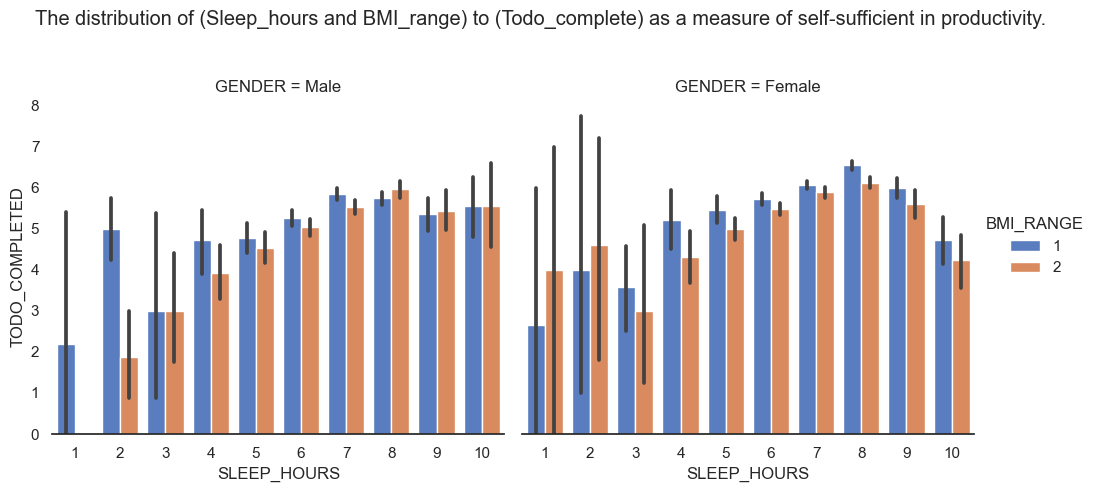

In [101]:
e = sns.catplot(dfc, x="SLEEP_HOURS", y="TODO_COMPLETED", hue="BMI_RANGE",
    palette="muted", col="GENDER", kind="bar"
)

e.despine(left=True)
e.fig.subplots_adjust(top=.8)
e.fig.suptitle("The distribution of (Sleep_hours and BMI_range) to (Todo_complete) as a measure of self-sufficient in productivity.")
plt.savefig("../images/analysis3_2.png")

### Observation
Demographically, completed task peak at 8 hours of sleep for female and at 7 hours of sleep for male.
This data supports the finding in which women needs more sleep than men due to social gap in responsibilities and gendered tradeoffs.

### The relationship between (Daily_stress) and (Todo_complete) to conclude whether an orderly and productive life would impose less stress.

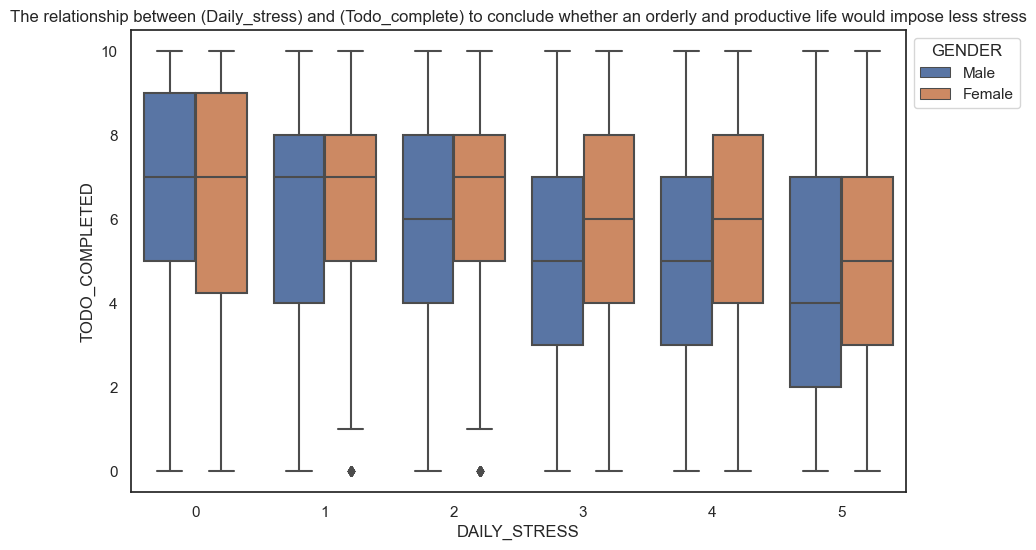

In [102]:
fig, (ax1) = plt.subplots(1, figsize=(10,6))
sns.set(rc={"figure.figsize":(6, 5)}, style='white')

f = sns.boxplot(data=dfc, x="DAILY_STRESS", y="TODO_COMPLETED", hue="GENDER", hue_order=['Male','Female'])
sns.move_legend(f, "upper left", bbox_to_anchor=(1, 1))
f.set_title("The relationship between (Daily_stress) and (Todo_complete) to conclude whether an orderly and productive life would impose less stress")

plt.savefig("../images/analysis3_3.png",bbox_inches='tight')

### Observation
The boxplot graph shows that male retain lower daily stress (1 and 2) at bigger range of completed task (from 4 to 8) than female (range 5 to 8). At intermediate daily stress (3 and 4), both genders have similar range of completed task but male has lower range (from 3 to 7) than female (from 4 to 8). At the lowest daily stress, female has bigger range of completed task than male, while at the highest stress level, male has bigger range. Therefore, having more completed task result in lower levels of daily stress in both males and females. It shows that having an orderly and productive life do impose less stress in daily life. 

### The relationship between (BMI_range) and (Daily_stress) to see if healthy lifestyle will lead to healthy mind.

In [ ]:
g = sns.displot(
    dfc, x="DAILY_STRESS", col="GENDER", hue="BMI_RANGE",
    binwidth=3, height=3, facet_kws=dict(margin_titles=True),
    kde=True
)
g.fig.subplots_adjust(top=.8)
g.fig.suptitle("The relationship between (BMI_range) and (Daily_stress) to see if healthy lifestyle will lead to healthy mind")

### Observation
Lower BMI_RANGE results in lower levels of DAILY_STRESS in male more prominently than female. However, at high stress level, there is little to no difference in BMI_RANGE for both genders. At other stress levels, there is no pronounced trend that correlates BMI_RANGE and DAILY_STRESS level which shows that BMI_RANGE is not a leading factor affecting daily stress. This aligns with recent research that claimed BMI_RANGE is not a good indicator of a healthy body as lower and higher BMI count can also be unhealthy.

## Milestone 5

### Task 1: Process your data for your Tableau Dashboard

In [11]:
dfc.to_csv("analysis3_data.csv", index=None)

## Conclusion

Self-sufficient is a major part of self-care in leading a thriving life as shown by the relationship between physical and mental health factors. Motivation to accomplish things in life is driven by being self-sufficient and having more completed task result in lower levels of daily stress showing that having an orderly and productive life do impose less stress in daily life. However, BMI range is not a leading factor affecting daily stress which aligns with some recent research that claimed BMI_RANGE is not a good indicator of a healthy body as lower and higher BMI count can also be unhealthy.